In [4]:
import pandas as pd

In [5]:
data_train=pd.read_csv('train.csv')
data_test=pd.read_csv('test.csv')

In [6]:
data_train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [7]:
data_test.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


In [8]:
data_train.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [9]:
data_test.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
Open_Date = LabelEncoder()
data_train['Open Date'] = Open_Date.fit_transform(data_train['Open Date'])

City = LabelEncoder()
data_train['City'] = City.fit_transform(data_train['City'])

City_Group = LabelEncoder()
data_train['City Group'] = City_Group.fit_transform(data_train['City Group'])

Type = LabelEncoder()
data_train['Type'] = Type.fit_transform(data_train['Type'])

In [12]:
Open_Date = LabelEncoder()
data_test['Open Date'] = Open_Date.fit_transform(data_test['Open Date'])

City = LabelEncoder()
data_test['City'] = City.fit_transform(data_test['City'])

City_Group = LabelEncoder()
data_test['City Group'] = City_Group.fit_transform(data_test['City Group'])

Type = LabelEncoder()
data_test['Type'] = Type.fit_transform(data_test['Type'])

In [13]:
x_train=data_train.drop(['revenue'],axis=1)
y_train=data_train['revenue']
x_test=data_test

In [14]:
from sklearn import tree

In [15]:
rtree=tree.DecisionTreeRegressor()

In [16]:
rtree.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [17]:
y_pred=rtree.predict(x_test)

In [18]:
feature_imp=pd.DataFrame()
feature_imp['col']=x_train.columns
feature_imp['imp']=rtree.feature_importances_*100
feature_imp.sort_values('imp',ascending=True)

,col,imp
11,P7,0.000000
3,City Group,0.000000
17,P13,0.000000
34,P30,0.000000
26,P22,0.000216
18,P14,0.000556
4,Type,0.000574
39,P35,0.001851
28,P24,0.001990
41,P37,0.005540


In [19]:
x_train=x_train[['P32','P29','Open Date','P12','Id','City','P33','P25','P21','P28','P2','P20','P6','P11']]
x_train.head()

,P32,P29,Open Date,P12,Id,City,P33,P25,P21,P28,P2,P20,P6,P11
0,4,3.0,59,5,0,31,5,1,1,2.0,5.0,4,2,3
1,0,3.0,16,5,1,3,0,0,1,3.0,5.0,2,2,1
2,0,3.0,20,5,2,10,0,0,1,1.0,4.0,1,3,2
3,10,7.5,10,10,3,28,6,2,6,2.5,4.5,12,4,8
4,3,3.0,41,5,4,14,2,3,1,1.0,4.0,2,2,2


In [22]:
# from sklearn import metrics
# import numpy as np
# print(metrics.mean_squared_error(x_test,y_pred))
# print(metrics.mean_absolute_error(x_test,y_pred))

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
param_grid={"criterion":['mse','mae'],
            "max_features":[1,2,3,4,5],
            "splitter":['best','random'],
            "min_samples_leaf":[2,3,4,6,8,10],
            "max_depth":[2,4,6,8,10,12,18]
           }

In [25]:
optimized_tree=GridSearchCV(rtree,param_grid,scoring='neg_mean_absolute_error',verbose=2,cv=5)

In [26]:
optimized_tree.fit(x_train,y_train)

Fitting 5 folds for each of 840 candidates, totalling 4200 fits
[CV] criterion=mse, max_depth=2, max_features=1, min_samples_leaf=2, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=1, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=1, min_samples_leaf=2, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=1, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=1, min_samples_leaf=2, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=1, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=1, min_samples_leaf=2, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=1, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=1, min_samples_leaf=2, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=1, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mse, m

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=mse, max_depth=2, max_features=1, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=1, min_samples_leaf=8, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=1, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=1, min_samples_leaf=8, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=1, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=1, min_samples_leaf=8, splitter=random 
[CV]  criterion=mse, max_depth=2, max_features=1, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=1, min_samples_leaf=8, splitter=random 
[CV]  criterion=mse, max_depth=2, max_features=1, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=1, min_samples_leaf=8, splitter=random 
[CV]  criterion=mse, max_depth=2, max_features=1, min_samples_leaf=8, split

[CV]  criterion=mse, max_depth=2, max_features=2, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=2, min_samples_leaf=4, splitter=random 
[CV]  criterion=mse, max_depth=2, max_features=2, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=2, min_samples_leaf=6, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=2, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=2, min_samples_leaf=6, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=2, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=2, min_samples_leaf=6, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=2, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=2, min_samples_leaf=6, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=2, min_samples_leaf=6, splitter=

[CV]  criterion=mse, max_depth=2, max_features=3, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=3, min_samples_leaf=3, splitter=random 
[CV]  criterion=mse, max_depth=2, max_features=3, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=3, min_samples_leaf=3, splitter=random 
[CV]  criterion=mse, max_depth=2, max_features=3, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=3, min_samples_leaf=3, splitter=random 
[CV]  criterion=mse, max_depth=2, max_features=3, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=3, min_samples_leaf=3, splitter=random 
[CV]  criterion=mse, max_depth=2, max_features=3, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=3, min_samples_leaf=4, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=3, min_samples_leaf=

[CV]  criterion=mse, max_depth=2, max_features=4, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=4, min_samples_leaf=2, splitter=random 
[CV]  criterion=mse, max_depth=2, max_features=4, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=4, min_samples_leaf=2, splitter=random 
[CV]  criterion=mse, max_depth=2, max_features=4, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=4, min_samples_leaf=2, splitter=random 
[CV]  criterion=mse, max_depth=2, max_features=4, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=4, min_samples_leaf=3, s

[CV] criterion=mse, max_depth=2, max_features=4, min_samples_leaf=10, splitter=random 
[CV]  criterion=mse, max_depth=2, max_features=4, min_samples_leaf=10, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=4, min_samples_leaf=10, splitter=random 
[CV]  criterion=mse, max_depth=2, max_features=4, min_samples_leaf=10, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=5, min_samples_leaf=2, spli

[CV]  criterion=mse, max_depth=2, max_features=5, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=5, min_samples_leaf=8, splitter=random 
[CV]  criterion=mse, max_depth=2, max_features=5, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=5, min_samples_leaf=10, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=5, min_samples_leaf=10, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=5, min_samples_leaf=10, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=5, min_samples_leaf=10, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=5, min_samples_leaf=10, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=5, min_samples_leaf=10, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=5, min_samples_leaf=10, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=5, min_samples_leaf=10, s

[CV]  criterion=mse, max_depth=4, max_features=1, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=1, min_samples_leaf=8, splitter=best 
[CV]  criterion=mse, max_depth=4, max_features=1, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=1, min_samples_leaf=8, splitter=best 
[CV]  criterion=mse, max_depth=4, max_features=1, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=1, min_samples_leaf=8, splitter=best 
[CV]  criterion=mse, max_depth=4, max_features=1, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=1, min_samples_leaf=8, splitter=best 
[CV]  criterion=mse, max_depth=4, max_features=1, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=1, min_samples_leaf=8, splitter=best 
[CV]  criterion=mse, max_depth=4, max_features=1, min_samples_leaf=8, splitter=best

[CV]  criterion=mse, max_depth=4, max_features=2, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=2, min_samples_leaf=4, splitter=random 
[CV]  criterion=mse, max_depth=4, max_features=2, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=2, min_samples_leaf=6, splitter=best 
[CV]  criterion=mse, max_depth=4, max_features=2, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=2, min_samples_leaf=6, splitter=best 
[CV]  criterion=mse, max_depth=4, max_features=2, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=2, min_samples_leaf=6, splitter=best 
[CV]  criterion=mse, max_depth=4, max_features=2, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=2, min_samples_leaf=6, splitter=best 
[CV]  criterion=mse, max_depth=4, max_features=2, min_samples_leaf=6, splitter=

[CV]  criterion=mse, max_depth=4, max_features=3, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=3, min_samples_leaf=6, splitter=random 
[CV]  criterion=mse, max_depth=4, max_features=3, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=3, min_samples_leaf=6, splitter=random 
[CV]  criterion=mse, max_depth=4, max_features=3, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=3, min_samples_leaf=6, splitter=random 
[CV]  criterion=mse, max_depth=4, max_features=3, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=3, min_samples_leaf=6, splitter=random 
[CV]  criterion=mse, max_depth=4, max_features=3, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=3, min_samples_leaf=6, splitter=random 
[CV]  criterion=mse, max_depth=4, max_features=3, min_samples_leaf=

[CV]  criterion=mse, max_depth=4, max_features=4, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=4, min_samples_leaf=8, splitter=best 
[CV]  criterion=mse, max_depth=4, max_features=4, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=4, min_samples_leaf=8, splitter=random 
[CV]  criterion=mse, max_depth=4, max_features=4, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=4, min_samples_leaf=8, splitter=random 
[CV]  criterion=mse, max_depth=4, max_features=4, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=4, min_samples_leaf=8, splitter=random 
[CV]  criterion=mse, max_depth=4, max_features=4, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=4, min_samples_leaf=8, splitter=random 
[CV]  criterion=mse, max_depth=4, max_features=4, min_samples_leaf=8, s

[CV] criterion=mse, max_depth=6, max_features=1, min_samples_leaf=2, splitter=random 
[CV]  criterion=mse, max_depth=6, max_features=1, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=1, min_samples_leaf=3, splitter=best 
[CV]  criterion=mse, max_depth=6, max_features=1, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=1, min_samples_leaf=3, splitter=best 
[CV]  criterion=mse, max_depth=6, max_features=1, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=1, min_samples_leaf=3, splitter=best 
[CV]  criterion=mse, max_depth=6, max_features=1, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=1, min_samples_leaf=3, splitter=best 
[CV]  criterion=mse, max_depth=6, max_features=1, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=1, min_samples_leaf=3, splitter=bes

[CV] criterion=mse, max_depth=6, max_features=2, min_samples_leaf=6, splitter=random 
[CV]  criterion=mse, max_depth=6, max_features=2, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=2, min_samples_leaf=6, splitter=random 
[CV]  criterion=mse, max_depth=6, max_features=2, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=2, min_samples_leaf=6, splitter=random 
[CV]  criterion=mse, max_depth=6, max_features=2, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=2, min_samples_leaf=6, splitter=random 
[CV]  criterion=mse, max_depth=6, max_features=2, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=2, min_samples_leaf=8, splitter=best 
[CV]  criterion=mse, max_depth=6, max_features=2, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=2, min_samples_leaf=8, 

[CV]  criterion=mse, max_depth=6, max_features=3, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=3, min_samples_leaf=4, splitter=random 
[CV]  criterion=mse, max_depth=6, max_features=3, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=3, min_samples_leaf=4, splitter=random 
[CV]  criterion=mse, max_depth=6, max_features=3, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=3, min_samples_leaf=4, splitter=random 
[CV]  criterion=mse, max_depth=6, max_features=3, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=3, min_samples_leaf=6, splitter=best 
[CV]  criterion=mse, max_depth=6, max_features=3, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=3, min_samples_leaf=6, splitter=best 
[CV]  criterion=mse, max_depth=6, max_features=3, min_samples_leaf=6, s

[CV]  criterion=mse, max_depth=6, max_features=4, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=4, min_samples_leaf=3, splitter=random 
[CV]  criterion=mse, max_depth=6, max_features=4, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=4, min_samples_leaf=3, splitter=random 
[CV]  criterion=mse, max_depth=6, max_features=4, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=4, min_samples_leaf=4, splitter=best 
[CV]  criterion=mse, max_depth=6, max_features=4, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=4, min_samples_leaf=4, splitter=best 
[CV]  criterion=mse, max_depth=6, max_features=4, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=4, min_samples_leaf=4, splitter=best 
[CV]  criterion=mse, max_depth=6, max_features=4, min_samples_leaf=4, split

[CV]  criterion=mse, max_depth=6, max_features=5, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=5, min_samples_leaf=2, splitter=random 
[CV]  criterion=mse, max_depth=6, max_features=5, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=5, min_samples_leaf=3, splitter=best 
[CV]  criterion=mse, max_depth=6, max_features=5, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=5, min_samples_leaf=3, splitter=best 
[CV]  criterion=mse, max_depth=6, max_features=5, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=5, min_samples_leaf=3, splitter=best 
[CV]  criterion=mse, max_depth=6, max_features=5, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=5, min_samples_leaf=3, splitter=best 
[CV]  criterion=mse, max_depth=6, max_features=5, min_samples_leaf=3, splitter=

[CV]  criterion=mse, max_depth=6, max_features=5, min_samples_leaf=10, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=1, min_samples_leaf=2, splitter=best 
[CV]  criterion=mse, max_depth=8, max_features=1, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=1, min_samples_leaf=2, splitter=best 
[CV]  criterion=mse, max_depth=8, max_features=1, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=1, min_samples_leaf=2, splitter=best 
[CV]  criterion=mse, max_depth=8, max_features=1, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=1, min_samples_leaf=2, splitter=best 
[CV]  criterion=mse, max_depth=8, max_features=1, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=1, min_samples_leaf=2, splitter=best 
[CV]  criterion=mse, max_depth=8, max_features=1, min_samples_leaf=2, splitter=bes

[CV] criterion=mse, max_depth=8, max_features=1, min_samples_leaf=10, splitter=best 
[CV]  criterion=mse, max_depth=8, max_features=1, min_samples_leaf=10, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=1, min_samples_leaf=10, splitter=best 
[CV]  criterion=mse, max_depth=8, max_features=1, min_samples_leaf=10, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=1, min_samples_leaf=10, splitter=best 
[CV]  criterion=mse, max_depth=8, max_features=1, min_samples_leaf=10, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=1, min_samples_leaf=10, splitter=best 
[CV]  criterion=mse, max_depth=8, max_features=1, min_samples_leaf=10, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=1, min_samples_leaf=10, splitter=best 
[CV]  criterion=mse, max_depth=8, max_features=1, min_samples_leaf=10, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=1, min_samples_leaf=10, split

[CV]  criterion=mse, max_depth=8, max_features=2, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=2, min_samples_leaf=8, splitter=best 
[CV]  criterion=mse, max_depth=8, max_features=2, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=2, min_samples_leaf=8, splitter=best 
[CV]  criterion=mse, max_depth=8, max_features=2, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=2, min_samples_leaf=8, splitter=best 
[CV]  criterion=mse, max_depth=8, max_features=2, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=2, min_samples_leaf=8, splitter=best 
[CV]  criterion=mse, max_depth=8, max_features=2, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=2, min_samples_leaf=8, splitter=random 
[CV]  criterion=mse, max_depth=8, max_features=2, min_samples_leaf=8, splitter=rand

[CV]  criterion=mse, max_depth=8, max_features=3, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=3, min_samples_leaf=6, splitter=best 
[CV]  criterion=mse, max_depth=8, max_features=3, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=3, min_samples_leaf=6, splitter=best 
[CV]  criterion=mse, max_depth=8, max_features=3, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=3, min_samples_leaf=6, splitter=random 
[CV]  criterion=mse, max_depth=8, max_features=3, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=3, min_samples_leaf=6, splitter=random 
[CV]  criterion=mse, max_depth=8, max_features=3, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=3, min_samples_leaf=6, splitter=random 
[CV]  criterion=mse, max_depth=8, max_features=3, min_samples_leaf=6, split

[CV]  criterion=mse, max_depth=8, max_features=4, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=4, min_samples_leaf=4, splitter=best 
[CV]  criterion=mse, max_depth=8, max_features=4, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=4, min_samples_leaf=4, splitter=best 
[CV]  criterion=mse, max_depth=8, max_features=4, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=4, min_samples_leaf=4, splitter=best 
[CV]  criterion=mse, max_depth=8, max_features=4, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=4, min_samples_leaf=4, splitter=random 
[CV]  criterion=mse, max_depth=8, max_features=4, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=4, min_samples_leaf=4, splitter=random 
[CV]  criterion=mse, max_depth=8, max_features=4, min_samples_leaf=4, splitter=

[CV]  criterion=mse, max_depth=8, max_features=5, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=5, min_samples_leaf=3, splitter=best 
[CV]  criterion=mse, max_depth=8, max_features=5, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=5, min_samples_leaf=3, splitter=best 
[CV]  criterion=mse, max_depth=8, max_features=5, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=5, min_samples_leaf=3, splitter=best 
[CV]  criterion=mse, max_depth=8, max_features=5, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  criterion=mse, max_depth=8, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  criterion=mse, max_depth=8, max_features=5, min_samples_leaf=3, splitter=

[CV]  criterion=mse, max_depth=10, max_features=1, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=1, min_samples_leaf=2, splitter=best 
[CV]  criterion=mse, max_depth=10, max_features=1, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=1, min_samples_leaf=2, splitter=random 
[CV]  criterion=mse, max_depth=10, max_features=1, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=1, min_samples_leaf=2, splitter=random 
[CV]  criterion=mse, max_depth=10, max_features=1, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=1, min_samples_leaf=2, splitter=random 
[CV]  criterion=mse, max_depth=10, max_features=1, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=1, min_samples_leaf=2, splitter=random 
[CV]  criterion=mse, max_depth=10, max_features=1, min_sample

[CV]  criterion=mse, max_depth=10, max_features=1, min_samples_leaf=10, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=1, min_samples_leaf=10, splitter=best 
[CV]  criterion=mse, max_depth=10, max_features=1, min_samples_leaf=10, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=1, min_samples_leaf=10, splitter=random 
[CV]  criterion=mse, max_depth=10, max_features=1, min_samples_leaf=10, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=1, min_samples_leaf=10, splitter=random 
[CV]  criterion=mse, max_depth=10, max_features=1, min_samples_leaf=10, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=1, min_samples_leaf=10, splitter=random 
[CV]  criterion=mse, max_depth=10, max_features=1, min_samples_leaf=10, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=1, min_samples_leaf=10, splitter=random 
[CV]  criterion=mse, max_depth=10, max_features=1, 

[CV]  criterion=mse, max_depth=10, max_features=2, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=2, min_samples_leaf=8, splitter=random 
[CV]  criterion=mse, max_depth=10, max_features=2, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=2, min_samples_leaf=8, splitter=random 
[CV]  criterion=mse, max_depth=10, max_features=2, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=2, min_samples_leaf=8, splitter=random 
[CV]  criterion=mse, max_depth=10, max_features=2, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=2, min_samples_leaf=8, splitter=random 
[CV]  criterion=mse, max_depth=10, max_features=2, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=2, min_samples_leaf=10, splitter=best 
[CV]  criterion=mse, max_depth=10, max_features=2, min_s

[CV]  criterion=mse, max_depth=10, max_features=3, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=3, min_samples_leaf=6, splitter=random 
[CV]  criterion=mse, max_depth=10, max_features=3, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=3, min_samples_leaf=6, splitter=random 
[CV]  criterion=mse, max_depth=10, max_features=3, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=3, min_samples_leaf=6, splitter=random 
[CV]  criterion=mse, max_depth=10, max_features=3, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=3, min_samples_leaf=8, splitter=best 
[CV]  criterion=mse, max_depth=10, max_features=3, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=3, min_samples_leaf=8, splitter=best 
[CV]  criterion=mse, max_depth=10, max_features=3, min_sample

[CV]  criterion=mse, max_depth=10, max_features=4, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=4, min_samples_leaf=4, splitter=random 
[CV]  criterion=mse, max_depth=10, max_features=4, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=4, min_samples_leaf=4, splitter=random 
[CV]  criterion=mse, max_depth=10, max_features=4, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=4, min_samples_leaf=6, splitter=best 
[CV]  criterion=mse, max_depth=10, max_features=4, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=4, min_samples_leaf=6, splitter=best 
[CV]  criterion=mse, max_depth=10, max_features=4, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=4, min_samples_leaf=6, splitter=best 
[CV]  criterion=mse, max_depth=10, max_features=4, min_samples_le

[CV] criterion=mse, max_depth=10, max_features=5, min_samples_leaf=8, splitter=random 
[CV]  criterion=mse, max_depth=10, max_features=5, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=5, min_samples_leaf=8, splitter=random 
[CV]  criterion=mse, max_depth=10, max_features=5, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=5, min_samples_leaf=10, splitter=best 
[CV]  criterion=mse, max_depth=10, max_features=5, min_samples_leaf=10, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=5, min_samples_leaf=10, splitter=best 
[CV]  criterion=mse, max_depth=10, max_features=5, min_samples_leaf=10, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=5, min_samples_leaf=10, splitter=best 
[CV]  criterion=mse, max_depth=10, max_features=5, min_samples_leaf=10, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=5, min_samples

[CV]  criterion=mse, max_depth=12, max_features=2, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=2, min_samples_leaf=3, splitter=random 
[CV]  criterion=mse, max_depth=12, max_features=2, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=2, min_samples_leaf=3, splitter=random 
[CV]  criterion=mse, max_depth=12, max_features=2, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=2, min_samples_leaf=3, splitter=random 
[CV]  criterion=mse, max_depth=12, max_features=2, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=2, min_samples_leaf=3, splitter=random 
[CV]  criterion=mse, max_depth=12, max_features=2, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=2, min_samples_leaf=3, splitter=random 
[CV]  criterion=mse, max_depth=12, max_features=2, min_sa

[CV]  criterion=mse, max_depth=12, max_features=3, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=3, min_samples_leaf=6, splitter=random 
[CV]  criterion=mse, max_depth=12, max_features=3, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=3, min_samples_leaf=8, splitter=best 
[CV]  criterion=mse, max_depth=12, max_features=3, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=3, min_samples_leaf=8, splitter=best 
[CV]  criterion=mse, max_depth=12, max_features=3, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=3, min_samples_leaf=8, splitter=best 
[CV]  criterion=mse, max_depth=12, max_features=3, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=3, min_samples_leaf=8, splitter=best 
[CV]  criterion=mse, max_depth=12, max_features=3, min_samples_leaf=8

[CV]  criterion=mse, max_depth=12, max_features=4, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=4, min_samples_leaf=4, splitter=random 
[CV]  criterion=mse, max_depth=12, max_features=4, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=4, min_samples_leaf=4, splitter=random 
[CV]  criterion=mse, max_depth=12, max_features=4, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=4, min_samples_leaf=4, splitter=random 
[CV]  criterion=mse, max_depth=12, max_features=4, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=4, min_samples_leaf=6, splitter=best 
[CV]  criterion=mse, max_depth=12, max_features=4, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=4, min_samples_leaf=6, splitter=best 
[CV]  criterion=mse, max_depth=12, max_features=4, min_sample

[CV]  criterion=mse, max_depth=12, max_features=5, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  criterion=mse, max_depth=12, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  criterion=mse, max_depth=12, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  criterion=mse, max_depth=12, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  criterion=mse, max_depth=12, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  criterion=mse, max_depth=12, max_features=5, min_sa

[CV]  criterion=mse, max_depth=18, max_features=1, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=18, max_features=1, min_samples_leaf=2, splitter=random 
[CV]  criterion=mse, max_depth=18, max_features=1, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=18, max_features=1, min_samples_leaf=2, splitter=random 
[CV]  criterion=mse, max_depth=18, max_features=1, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=18, max_features=1, min_samples_leaf=2, splitter=random 
[CV]  criterion=mse, max_depth=18, max_features=1, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=18, max_features=1, min_samples_leaf=3, splitter=best 
[CV]  criterion=mse, max_depth=18, max_features=1, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=18, max_features=1, min_samples_leaf=3, splitter=best 
[CV]  criterion=mse, max_depth=18, max_features=1, min_sample

[CV]  criterion=mse, max_depth=18, max_features=1, min_samples_leaf=10, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=18, max_features=1, min_samples_leaf=10, splitter=random 
[CV]  criterion=mse, max_depth=18, max_features=1, min_samples_leaf=10, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=18, max_features=1, min_samples_leaf=10, splitter=random 
[CV]  criterion=mse, max_depth=18, max_features=1, min_samples_leaf=10, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=18, max_features=1, min_samples_leaf=10, splitter=random 
[CV]  criterion=mse, max_depth=18, max_features=1, min_samples_leaf=10, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=18, max_features=1, min_samples_leaf=10, splitter=random 
[CV]  criterion=mse, max_depth=18, max_features=1, min_samples_leaf=10, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=18, max_features=2, min_samples_leaf=2, splitter=best 
[CV]  criterion=mse, max_depth=18, max_features=

[CV]  criterion=mse, max_depth=18, max_features=2, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=18, max_features=2, min_samples_leaf=8, splitter=random 
[CV]  criterion=mse, max_depth=18, max_features=2, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=18, max_features=2, min_samples_leaf=8, splitter=random 
[CV]  criterion=mse, max_depth=18, max_features=2, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=18, max_features=2, min_samples_leaf=8, splitter=random 
[CV]  criterion=mse, max_depth=18, max_features=2, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=18, max_features=2, min_samples_leaf=10, splitter=best 
[CV]  criterion=mse, max_depth=18, max_features=2, min_samples_leaf=10, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=18, max_features=2, min_samples_leaf=10, splitter=best 
[CV]  criterion=mse, max_depth=18, max_features=2, min_sam

[CV]  criterion=mse, max_depth=18, max_features=3, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=18, max_features=3, min_samples_leaf=6, splitter=random 
[CV]  criterion=mse, max_depth=18, max_features=3, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=18, max_features=3, min_samples_leaf=6, splitter=random 
[CV]  criterion=mse, max_depth=18, max_features=3, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=18, max_features=3, min_samples_leaf=8, splitter=best 
[CV]  criterion=mse, max_depth=18, max_features=3, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=18, max_features=3, min_samples_leaf=8, splitter=best 
[CV]  criterion=mse, max_depth=18, max_features=3, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=18, max_features=3, min_samples_leaf=8, splitter=best 
[CV]  criterion=mse, max_depth=18, max_features=3, min_samples_le

[CV]  criterion=mse, max_depth=18, max_features=4, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=18, max_features=4, min_samples_leaf=4, splitter=random 
[CV]  criterion=mse, max_depth=18, max_features=4, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=18, max_features=4, min_samples_leaf=6, splitter=best 
[CV]  criterion=mse, max_depth=18, max_features=4, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=18, max_features=4, min_samples_leaf=6, splitter=best 
[CV]  criterion=mse, max_depth=18, max_features=4, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=18, max_features=4, min_samples_leaf=6, splitter=best 
[CV]  criterion=mse, max_depth=18, max_features=4, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=18, max_features=4, min_samples_leaf=6, splitter=best 
[CV]  criterion=mse, max_depth=18, max_features=4, min_samples_leaf=6

[CV]  criterion=mse, max_depth=18, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=18, max_features=5, min_samples_leaf=4, splitter=best 
[CV]  criterion=mse, max_depth=18, max_features=5, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=18, max_features=5, min_samples_leaf=4, splitter=best 
[CV]  criterion=mse, max_depth=18, max_features=5, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=18, max_features=5, min_samples_leaf=4, splitter=best 
[CV]  criterion=mse, max_depth=18, max_features=5, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=18, max_features=5, min_samples_leaf=4, splitter=best 
[CV]  criterion=mse, max_depth=18, max_features=5, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=18, max_features=5, min_samples_leaf=4, splitter=best 
[CV]  criterion=mse, max_depth=18, max_features=5, min_samples_leaf=4, sp

[CV]  criterion=mae, max_depth=2, max_features=1, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=2, max_features=1, min_samples_leaf=3, splitter=best 
[CV]  criterion=mae, max_depth=2, max_features=1, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=2, max_features=1, min_samples_leaf=3, splitter=best 
[CV]  criterion=mae, max_depth=2, max_features=1, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=2, max_features=1, min_samples_leaf=3, splitter=best 
[CV]  criterion=mae, max_depth=2, max_features=1, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=2, max_features=1, min_samples_leaf=3, splitter=best 
[CV]  criterion=mae, max_depth=2, max_features=1, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=2, max_features=1, min_samples_leaf=3, splitter=best 
[CV]  criterion=mae, max_depth=2, max_features=1, min_samples_leaf=3, splitter=best

[CV]  criterion=mae, max_depth=2, max_features=2, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=2, max_features=2, min_samples_leaf=2, splitter=best 
[CV]  criterion=mae, max_depth=2, max_features=2, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=2, max_features=2, min_samples_leaf=2, splitter=best 
[CV]  criterion=mae, max_depth=2, max_features=2, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=2, max_features=2, min_samples_leaf=2, splitter=best 
[CV]  criterion=mae, max_depth=2, max_features=2, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=2, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  criterion=mae, max_depth=2, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=2, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  criterion=mae, max_depth=2, max_features=2, min_samples_leaf=2, splitter=

[CV]  criterion=mae, max_depth=2, max_features=2, min_samples_leaf=10, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=2, max_features=2, min_samples_leaf=10, splitter=best 
[CV]  criterion=mae, max_depth=2, max_features=2, min_samples_leaf=10, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=2, max_features=2, min_samples_leaf=10, splitter=best 
[CV]  criterion=mae, max_depth=2, max_features=2, min_samples_leaf=10, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=2, max_features=2, min_samples_leaf=10, splitter=best 
[CV]  criterion=mae, max_depth=2, max_features=2, min_samples_leaf=10, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=2, max_features=2, min_samples_leaf=10, splitter=random 
[CV]  criterion=mae, max_depth=2, max_features=2, min_samples_leaf=10, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=2, max_features=2, min_samples_leaf=10, splitter=random 
[CV]  criterion=mae, max_depth=2, max_features=2, min_samples_leaf=10

[CV]  criterion=mae, max_depth=2, max_features=3, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=2, max_features=3, min_samples_leaf=8, splitter=best 
[CV]  criterion=mae, max_depth=2, max_features=3, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=2, max_features=3, min_samples_leaf=8, splitter=best 
[CV]  criterion=mae, max_depth=2, max_features=3, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=2, max_features=3, min_samples_leaf=8, splitter=best 
[CV]  criterion=mae, max_depth=2, max_features=3, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=2, max_features=3, min_samples_leaf=8, splitter=best 
[CV]  criterion=mae, max_depth=2, max_features=3, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=2, max_features=3, min_samples_leaf=8, splitter=random 
[CV]  criterion=mae, max_depth=2, max_features=3, min_samples_leaf=8, splitter=rand

[CV]  criterion=mae, max_depth=2, max_features=4, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=2, max_features=4, min_samples_leaf=4, splitter=random 
[CV]  criterion=mae, max_depth=2, max_features=4, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=2, max_features=4, min_samples_leaf=6, splitter=best 
[CV]  criterion=mae, max_depth=2, max_features=4, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=2, max_features=4, min_samples_leaf=6, splitter=best 
[CV]  criterion=mae, max_depth=2, max_features=4, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=2, max_features=4, min_samples_leaf=6, splitter=best 
[CV]  criterion=mae, max_depth=2, max_features=4, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=2, max_features=4, min_samples_leaf=6, splitter=best 
[CV]  criterion=mae, max_depth=2, max_features=4, min_samples_leaf=6, splitter=

[CV]  criterion=mae, max_depth=2, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=2, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  criterion=mae, max_depth=2, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=2, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  criterion=mae, max_depth=2, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=2, max_features=5, min_samples_leaf=4, splitter=best 
[CV]  criterion=mae, max_depth=2, max_features=5, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=2, max_features=5, min_samples_leaf=4, splitter=best 
[CV]  criterion=mae, max_depth=2, max_features=5, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=2, max_features=5, min_samples_leaf=4, splitter=best 
[CV]  criterion=mae, max_depth=2, max_features=5, min_samples_leaf=4, split

[CV]  criterion=mae, max_depth=4, max_features=1, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=1, min_samples_leaf=2, splitter=random 
[CV]  criterion=mae, max_depth=4, max_features=1, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=1, min_samples_leaf=2, splitter=random 
[CV]  criterion=mae, max_depth=4, max_features=1, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=1, min_samples_leaf=2, splitter=random 
[CV]  criterion=mae, max_depth=4, max_features=1, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=1, min_samples_leaf=3, splitter=best 
[CV]  criterion=mae, max_depth=4, max_features=1, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=1, min_samples_leaf=3, splitter=best 
[CV]  criterion=mae, max_depth=4, max_features=1, min_samples_leaf=3, s

[CV]  criterion=mae, max_depth=4, max_features=1, min_samples_leaf=10, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=1, min_samples_leaf=10, splitter=random 
[CV]  criterion=mae, max_depth=4, max_features=1, min_samples_leaf=10, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=1, min_samples_leaf=10, splitter=random 
[CV]  criterion=mae, max_depth=4, max_features=1, min_samples_leaf=10, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=1, min_samples_leaf=10, splitter=random 
[CV]  criterion=mae, max_depth=4, max_features=1, min_samples_leaf=10, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=2, min_samples_leaf=2, splitter=best 
[CV]  criterion=mae, max_depth=4, max_features=2, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=2, min_samples_leaf=2, splitter=best 
[CV]  criterion=mae, max_depth=4, max_features=2, min_samples_le

[CV]  criterion=mae, max_depth=4, max_features=2, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=2, min_samples_leaf=8, splitter=random 
[CV]  criterion=mae, max_depth=4, max_features=2, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=2, min_samples_leaf=8, splitter=random 
[CV]  criterion=mae, max_depth=4, max_features=2, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=2, min_samples_leaf=8, splitter=random 
[CV]  criterion=mae, max_depth=4, max_features=2, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=2, min_samples_leaf=8, splitter=random 
[CV]  criterion=mae, max_depth=4, max_features=2, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=2, min_samples_leaf=8, splitter=random 
[CV]  criterion=mae, max_depth=4, max_features=2, min_samples_leaf=

[CV]  criterion=mae, max_depth=4, max_features=3, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=3, min_samples_leaf=6, splitter=best 
[CV]  criterion=mae, max_depth=4, max_features=3, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=3, min_samples_leaf=6, splitter=best 
[CV]  criterion=mae, max_depth=4, max_features=3, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=3, min_samples_leaf=6, splitter=random 
[CV]  criterion=mae, max_depth=4, max_features=3, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=3, min_samples_leaf=6, splitter=random 
[CV]  criterion=mae, max_depth=4, max_features=3, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=3, min_samples_leaf=6, splitter=random 
[CV]  criterion=mae, max_depth=4, max_features=3, min_samples_leaf=6, split

[CV]  criterion=mae, max_depth=4, max_features=4, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=4, min_samples_leaf=4, splitter=best 
[CV]  criterion=mae, max_depth=4, max_features=4, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=4, min_samples_leaf=4, splitter=best 
[CV]  criterion=mae, max_depth=4, max_features=4, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=4, min_samples_leaf=4, splitter=best 
[CV]  criterion=mae, max_depth=4, max_features=4, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=4, min_samples_leaf=4, splitter=random 
[CV]  criterion=mae, max_depth=4, max_features=4, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=4, min_samples_leaf=4, splitter=random 
[CV]  criterion=mae, max_depth=4, max_features=4, min_samples_leaf=4, splitter=

[CV]  criterion=mae, max_depth=4, max_features=5, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=5, min_samples_leaf=2, splitter=random 
[CV]  criterion=mae, max_depth=4, max_features=5, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=5, min_samples_leaf=2, splitter=random 
[CV]  criterion=mae, max_depth=4, max_features=5, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=5, min_samples_leaf=2, splitter=random 
[CV]  criterion=mae, max_depth=4, max_features=5, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=5, min_samples_leaf=3, splitter=best 
[CV]  criterion=mae, max_depth=4, max_features=5, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=5, min_samples_leaf=3, splitter=best 
[CV]  criterion=mae, max_depth=4, max_features=5, min_samples_leaf=3, s

[CV]  criterion=mae, max_depth=4, max_features=5, min_samples_leaf=10, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=5, min_samples_leaf=10, splitter=best 
[CV]  criterion=mae, max_depth=4, max_features=5, min_samples_leaf=10, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=5, min_samples_leaf=10, splitter=best 
[CV]  criterion=mae, max_depth=4, max_features=5, min_samples_leaf=10, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=5, min_samples_leaf=10, splitter=random 
[CV]  criterion=mae, max_depth=4, max_features=5, min_samples_leaf=10, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=5, min_samples_leaf=10, splitter=random 
[CV]  criterion=mae, max_depth=4, max_features=5, min_samples_leaf=10, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=5, min_samples_leaf=10, splitter=random 
[CV]  criterion=mae, max_depth=4, max_features=5, min_samples_lea

[CV]  criterion=mae, max_depth=6, max_features=1, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=6, max_features=1, min_samples_leaf=8, splitter=best 
[CV]  criterion=mae, max_depth=6, max_features=1, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=6, max_features=1, min_samples_leaf=8, splitter=best 
[CV]  criterion=mae, max_depth=6, max_features=1, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=6, max_features=1, min_samples_leaf=8, splitter=best 
[CV]  criterion=mae, max_depth=6, max_features=1, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=6, max_features=1, min_samples_leaf=8, splitter=best 
[CV]  criterion=mae, max_depth=6, max_features=1, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=6, max_features=1, min_samples_leaf=8, splitter=best 
[CV]  criterion=mae, max_depth=6, max_features=1, min_samples_leaf=8, splitter=best

[CV]  criterion=mae, max_depth=6, max_features=2, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=6, max_features=2, min_samples_leaf=6, splitter=best 
[CV]  criterion=mae, max_depth=6, max_features=2, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=6, max_features=2, min_samples_leaf=6, splitter=best 
[CV]  criterion=mae, max_depth=6, max_features=2, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=6, max_features=2, min_samples_leaf=6, splitter=best 
[CV]  criterion=mae, max_depth=6, max_features=2, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=6, max_features=2, min_samples_leaf=6, splitter=best 
[CV]  criterion=mae, max_depth=6, max_features=2, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=6, max_features=2, min_samples_leaf=6, splitter=best 
[CV]  criterion=mae, max_depth=6, max_features=2, min_samples_leaf=6, splitter=best

[CV]  criterion=mae, max_depth=6, max_features=3, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=6, max_features=3, min_samples_leaf=3, splitter=random 
[CV]  criterion=mae, max_depth=6, max_features=3, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=6, max_features=3, min_samples_leaf=3, splitter=random 
[CV]  criterion=mae, max_depth=6, max_features=3, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=6, max_features=3, min_samples_leaf=4, splitter=best 
[CV]  criterion=mae, max_depth=6, max_features=3, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=6, max_features=3, min_samples_leaf=4, splitter=best 
[CV]  criterion=mae, max_depth=6, max_features=3, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=6, max_features=3, min_samples_leaf=4, splitter=best 
[CV]  criterion=mae, max_depth=6, max_features=3, min_samples_leaf=4, split

[CV]  criterion=mae, max_depth=6, max_features=4, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=6, max_features=4, min_samples_leaf=2, splitter=best 
[CV]  criterion=mae, max_depth=6, max_features=4, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=6, max_features=4, min_samples_leaf=2, splitter=random 
[CV]  criterion=mae, max_depth=6, max_features=4, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=6, max_features=4, min_samples_leaf=2, splitter=random 
[CV]  criterion=mae, max_depth=6, max_features=4, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=6, max_features=4, min_samples_leaf=2, splitter=random 
[CV]  criterion=mae, max_depth=6, max_features=4, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=6, max_features=4, min_samples_leaf=2, splitter=random 
[CV]  criterion=mae, max_depth=6, max_features=4, min_samples_leaf=2, s

[CV]  criterion=mae, max_depth=6, max_features=4, min_samples_leaf=10, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=6, max_features=4, min_samples_leaf=10, splitter=best 
[CV]  criterion=mae, max_depth=6, max_features=4, min_samples_leaf=10, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=6, max_features=4, min_samples_leaf=10, splitter=best 
[CV]  criterion=mae, max_depth=6, max_features=4, min_samples_leaf=10, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=6, max_features=4, min_samples_leaf=10, splitter=best 
[CV]  criterion=mae, max_depth=6, max_features=4, min_samples_leaf=10, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=6, max_features=4, min_samples_leaf=10, splitter=random 
[CV]  criterion=mae, max_depth=6, max_features=4, min_samples_leaf=10, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=6, max_features=4, min_samples_leaf=10, splitter=random 
[CV]  criterion=mae, max_depth=6, max_features=4, min_samples_leaf=10

[CV]  criterion=mae, max_depth=8, max_features=1, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=1, min_samples_leaf=4, splitter=best 
[CV]  criterion=mae, max_depth=8, max_features=1, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=1, min_samples_leaf=4, splitter=best 
[CV]  criterion=mae, max_depth=8, max_features=1, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=1, min_samples_leaf=4, splitter=best 
[CV]  criterion=mae, max_depth=8, max_features=1, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=1, min_samples_leaf=4, splitter=best 
[CV]  criterion=mae, max_depth=8, max_features=1, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=1, min_samples_leaf=4, splitter=random 
[CV]  criterion=mae, max_depth=8, max_features=1, min_samples_leaf=4, splitter=rand

[CV]  criterion=mae, max_depth=8, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=2, min_samples_leaf=3, splitter=best 
[CV]  criterion=mae, max_depth=8, max_features=2, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=2, min_samples_leaf=3, splitter=best 
[CV]  criterion=mae, max_depth=8, max_features=2, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=2, min_samples_leaf=3, splitter=best 
[CV]  criterion=mae, max_depth=8, max_features=2, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=2, min_samples_leaf=3, splitter=best 
[CV]  criterion=mae, max_depth=8, max_features=2, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=2, min_samples_leaf=3, splitter=best 
[CV]  criterion=mae, max_depth=8, max_features=2, min_samples_leaf=3, splitter=best

[CV]  criterion=mae, max_depth=8, max_features=2, min_samples_leaf=10, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=2, min_samples_leaf=10, splitter=random 
[CV]  criterion=mae, max_depth=8, max_features=2, min_samples_leaf=10, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=3, min_samples_leaf=2, splitter=best 
[CV]  criterion=mae, max_depth=8, max_features=3, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=3, min_samples_leaf=2, splitter=best 
[CV]  criterion=mae, max_depth=8, max_features=3, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=3, min_samples_leaf=2, splitter=best 
[CV]  criterion=mae, max_depth=8, max_features=3, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=3, min_samples_leaf=2, splitter=best 
[CV]  criterion=mae, max_depth=8, max_features=3, min_samples_leaf=2, splitt

[CV]  criterion=mae, max_depth=8, max_features=3, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=3, min_samples_leaf=8, splitter=random 
[CV]  criterion=mae, max_depth=8, max_features=3, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=3, min_samples_leaf=8, splitter=random 
[CV]  criterion=mae, max_depth=8, max_features=3, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=3, min_samples_leaf=8, splitter=random 
[CV]  criterion=mae, max_depth=8, max_features=3, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=3, min_samples_leaf=8, splitter=random 
[CV]  criterion=mae, max_depth=8, max_features=3, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=3, min_samples_leaf=8, splitter=random 
[CV]  criterion=mae, max_depth=8, max_features=3, min_samples_leaf=

[CV]  criterion=mae, max_depth=8, max_features=4, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=4, min_samples_leaf=6, splitter=best 
[CV]  criterion=mae, max_depth=8, max_features=4, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=4, min_samples_leaf=6, splitter=best 
[CV]  criterion=mae, max_depth=8, max_features=4, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=4, min_samples_leaf=6, splitter=best 
[CV]  criterion=mae, max_depth=8, max_features=4, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=4, min_samples_leaf=6, splitter=best 
[CV]  criterion=mae, max_depth=8, max_features=4, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=4, min_samples_leaf=6, splitter=random 
[CV]  criterion=mae, max_depth=8, max_features=4, min_samples_leaf=6, splitter=rand

[CV]  criterion=mae, max_depth=8, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  criterion=mae, max_depth=8, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  criterion=mae, max_depth=8, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  criterion=mae, max_depth=8, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  criterion=mae, max_depth=8, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=5, min_samples_leaf=4, splitter=best 
[CV]  criterion=mae, max_depth=8, max_features=5, min_samples_leaf=

[CV]  criterion=mae, max_depth=10, max_features=1, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=1, min_samples_leaf=2, splitter=best 
[CV]  criterion=mae, max_depth=10, max_features=1, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=1, min_samples_leaf=2, splitter=best 
[CV]  criterion=mae, max_depth=10, max_features=1, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=1, min_samples_leaf=2, splitter=random 
[CV]  criterion=mae, max_depth=10, max_features=1, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=1, min_samples_leaf=2, splitter=random 
[CV]  criterion=mae, max_depth=10, max_features=1, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=1, min_samples_leaf=2, splitter=random 
[CV]  criterion=mae, max_depth=10, max_features=1, min_samples_le

[CV]  criterion=mae, max_depth=10, max_features=1, min_samples_leaf=10, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=1, min_samples_leaf=10, splitter=best 
[CV]  criterion=mae, max_depth=10, max_features=1, min_samples_leaf=10, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=1, min_samples_leaf=10, splitter=best 
[CV]  criterion=mae, max_depth=10, max_features=1, min_samples_leaf=10, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=1, min_samples_leaf=10, splitter=best 
[CV]  criterion=mae, max_depth=10, max_features=1, min_samples_leaf=10, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=1, min_samples_leaf=10, splitter=best 
[CV]  criterion=mae, max_depth=10, max_features=1, min_samples_leaf=10, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=1, min_samples_leaf=10, splitter=random 
[CV]  criterion=mae, max_depth=10, max_features=1, min_samples_

[CV]  criterion=mae, max_depth=10, max_features=2, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=2, min_samples_leaf=6, splitter=random 
[CV]  criterion=mae, max_depth=10, max_features=2, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=2, min_samples_leaf=6, splitter=random 
[CV]  criterion=mae, max_depth=10, max_features=2, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=2, min_samples_leaf=8, splitter=best 
[CV]  criterion=mae, max_depth=10, max_features=2, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=2, min_samples_leaf=8, splitter=best 
[CV]  criterion=mae, max_depth=10, max_features=2, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=2, min_samples_leaf=8, splitter=best 
[CV]  criterion=mae, max_depth=10, max_features=2, min_samples_le

[CV]  criterion=mae, max_depth=10, max_features=3, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=3, min_samples_leaf=4, splitter=best 
[CV]  criterion=mae, max_depth=10, max_features=3, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=3, min_samples_leaf=4, splitter=random 
[CV]  criterion=mae, max_depth=10, max_features=3, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=3, min_samples_leaf=4, splitter=random 
[CV]  criterion=mae, max_depth=10, max_features=3, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=3, min_samples_leaf=4, splitter=random 
[CV]  criterion=mae, max_depth=10, max_features=3, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=3, min_samples_leaf=4, splitter=random 
[CV]  criterion=mae, max_depth=10, max_features=3, min_sample

[CV]  criterion=mae, max_depth=10, max_features=4, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  criterion=mae, max_depth=10, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  criterion=mae, max_depth=10, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  criterion=mae, max_depth=10, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  criterion=mae, max_depth=10, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  criterion=mae, max_depth=10, max_features=4, min_samples_leaf=3, sp

[CV]  criterion=mae, max_depth=10, max_features=4, min_samples_leaf=10, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=4, min_samples_leaf=10, splitter=random 
[CV]  criterion=mae, max_depth=10, max_features=4, min_samples_leaf=10, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=4, min_samples_leaf=10, splitter=random 
[CV]  criterion=mae, max_depth=10, max_features=4, min_samples_leaf=10, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=4, min_samples_leaf=10, splitter=random 
[CV]  criterion=mae, max_depth=10, max_features=4, min_samples_leaf=10, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  criterion=mae, max_depth=10, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  criterion=mae, max_depth=10, max_features=5, min

[CV]  criterion=mae, max_depth=10, max_features=5, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=5, min_samples_leaf=8, splitter=best 
[CV]  criterion=mae, max_depth=10, max_features=5, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=5, min_samples_leaf=8, splitter=best 
[CV]  criterion=mae, max_depth=10, max_features=5, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=5, min_samples_leaf=8, splitter=best 
[CV]  criterion=mae, max_depth=10, max_features=5, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=5, min_samples_leaf=8, splitter=best 
[CV]  criterion=mae, max_depth=10, max_features=5, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=5, min_samples_leaf=8, splitter=random 
[CV]  criterion=mae, max_depth=10, max_features=5, min_samples_leaf=8, sp

[CV] criterion=mae, max_depth=12, max_features=1, min_samples_leaf=6, splitter=best 
[CV]  criterion=mae, max_depth=12, max_features=1, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=1, min_samples_leaf=6, splitter=best 
[CV]  criterion=mae, max_depth=12, max_features=1, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=1, min_samples_leaf=6, splitter=best 
[CV]  criterion=mae, max_depth=12, max_features=1, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=1, min_samples_leaf=6, splitter=best 
[CV]  criterion=mae, max_depth=12, max_features=1, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=1, min_samples_leaf=6, splitter=best 
[CV]  criterion=mae, max_depth=12, max_features=1, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=1, min_samples_leaf=6, split

[CV]  criterion=mae, max_depth=12, max_features=2, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=2, min_samples_leaf=4, splitter=best 
[CV]  criterion=mae, max_depth=12, max_features=2, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=2, min_samples_leaf=4, splitter=best 
[CV]  criterion=mae, max_depth=12, max_features=2, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=2, min_samples_leaf=4, splitter=best 
[CV]  criterion=mae, max_depth=12, max_features=2, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=2, min_samples_leaf=4, splitter=best 
[CV]  criterion=mae, max_depth=12, max_features=2, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=2, min_samples_leaf=4, splitter=best 
[CV]  criterion=mae, max_depth=12, max_features=2, min_samples_leaf=4, sp

[CV]  criterion=mae, max_depth=12, max_features=3, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=3, min_samples_leaf=2, splitter=random 
[CV]  criterion=mae, max_depth=12, max_features=3, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=3, min_samples_leaf=2, splitter=random 
[CV]  criterion=mae, max_depth=12, max_features=3, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=3, min_samples_leaf=2, splitter=random 
[CV]  criterion=mae, max_depth=12, max_features=3, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  criterion=mae, max_depth=12, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  criterion=mae, max_depth=12, max_features=3, min_sample

[CV]  criterion=mae, max_depth=12, max_features=3, min_samples_leaf=10, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=3, min_samples_leaf=10, splitter=best 
[CV]  criterion=mae, max_depth=12, max_features=3, min_samples_leaf=10, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=3, min_samples_leaf=10, splitter=best 
[CV]  criterion=mae, max_depth=12, max_features=3, min_samples_leaf=10, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=3, min_samples_leaf=10, splitter=best 
[CV]  criterion=mae, max_depth=12, max_features=3, min_samples_leaf=10, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=3, min_samples_leaf=10, splitter=random 
[CV]  criterion=mae, max_depth=12, max_features=3, min_samples_leaf=10, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=3, min_samples_leaf=10, splitter=random 
[CV]  criterion=mae, max_depth=12, max_features=3, min_samp

[CV]  criterion=mae, max_depth=12, max_features=4, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=4, min_samples_leaf=6, splitter=random 
[CV]  criterion=mae, max_depth=12, max_features=4, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=4, min_samples_leaf=6, splitter=random 
[CV]  criterion=mae, max_depth=12, max_features=4, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=4, min_samples_leaf=6, splitter=random 
[CV]  criterion=mae, max_depth=12, max_features=4, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=4, min_samples_leaf=8, splitter=best 
[CV]  criterion=mae, max_depth=12, max_features=4, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=4, min_samples_leaf=8, splitter=best 
[CV]  criterion=mae, max_depth=12, max_features=4, min_sample

[CV]  criterion=mae, max_depth=12, max_features=5, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=5, min_samples_leaf=4, splitter=best 
[CV]  criterion=mae, max_depth=12, max_features=5, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=5, min_samples_leaf=4, splitter=random 
[CV]  criterion=mae, max_depth=12, max_features=5, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=5, min_samples_leaf=4, splitter=random 
[CV]  criterion=mae, max_depth=12, max_features=5, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=5, min_samples_leaf=4, splitter=random 
[CV]  criterion=mae, max_depth=12, max_features=5, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=5, min_samples_leaf=4, splitter=random 
[CV]  criterion=mae, max_depth=12, max_features=5, min_sample

[CV]  criterion=mae, max_depth=18, max_features=1, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=18, max_features=1, min_samples_leaf=3, splitter=best 
[CV]  criterion=mae, max_depth=18, max_features=1, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=18, max_features=1, min_samples_leaf=3, splitter=best 
[CV]  criterion=mae, max_depth=18, max_features=1, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=18, max_features=1, min_samples_leaf=3, splitter=best 
[CV]  criterion=mae, max_depth=18, max_features=1, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=18, max_features=1, min_samples_leaf=3, splitter=best 
[CV]  criterion=mae, max_depth=18, max_features=1, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=18, max_features=1, min_samples_leaf=3, splitter=best 
[CV]  criterion=mae, max_depth=18, max_features=1, min_samples_leaf=3, sp

[CV] criterion=mae, max_depth=18, max_features=1, min_samples_leaf=10, splitter=random 
[CV]  criterion=mae, max_depth=18, max_features=1, min_samples_leaf=10, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=18, max_features=2, min_samples_leaf=2, splitter=best 
[CV]  criterion=mae, max_depth=18, max_features=2, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=18, max_features=2, min_samples_leaf=2, splitter=best 
[CV]  criterion=mae, max_depth=18, max_features=2, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=18, max_features=2, min_samples_leaf=2, splitter=best 
[CV]  criterion=mae, max_depth=18, max_features=2, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=18, max_features=2, min_samples_leaf=2, splitter=best 
[CV]  criterion=mae, max_depth=18, max_features=2, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=18, max_features=2, min_samples_leaf=2,

[CV]  criterion=mae, max_depth=18, max_features=2, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=18, max_features=2, min_samples_leaf=8, splitter=random 
[CV]  criterion=mae, max_depth=18, max_features=2, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=18, max_features=2, min_samples_leaf=8, splitter=random 
[CV]  criterion=mae, max_depth=18, max_features=2, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=18, max_features=2, min_samples_leaf=8, splitter=random 
[CV]  criterion=mae, max_depth=18, max_features=2, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=18, max_features=2, min_samples_leaf=10, splitter=best 
[CV]  criterion=mae, max_depth=18, max_features=2, min_samples_leaf=10, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=18, max_features=2, min_samples_leaf=10, splitter=best 
[CV]  criterion=mae, max_depth=18, max_features=2, min_sam

[CV]  criterion=mae, max_depth=18, max_features=3, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=18, max_features=3, min_samples_leaf=6, splitter=best 
[CV]  criterion=mae, max_depth=18, max_features=3, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=18, max_features=3, min_samples_leaf=6, splitter=random 
[CV]  criterion=mae, max_depth=18, max_features=3, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=18, max_features=3, min_samples_leaf=6, splitter=random 
[CV]  criterion=mae, max_depth=18, max_features=3, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=18, max_features=3, min_samples_leaf=6, splitter=random 
[CV]  criterion=mae, max_depth=18, max_features=3, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=18, max_features=3, min_samples_leaf=6, splitter=random 
[CV]  criterion=mae, max_depth=18, max_features=3, min_sample

[CV]  criterion=mae, max_depth=18, max_features=4, min_samples_leaf=10, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=18, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  criterion=mae, max_depth=18, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=18, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  criterion=mae, max_depth=18, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=18, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  criterion=mae, max_depth=18, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=18, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  criterion=mae, max_depth=18, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=18, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  criterion=mae, max_depth=18, max_features=5, min_samples_leaf=2, s

[CV] criterion=mae, max_depth=18, max_features=5, min_samples_leaf=8, splitter=best 
[CV]  criterion=mae, max_depth=18, max_features=5, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=18, max_features=5, min_samples_leaf=8, splitter=best 
[CV]  criterion=mae, max_depth=18, max_features=5, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=18, max_features=5, min_samples_leaf=8, splitter=random 
[CV]  criterion=mae, max_depth=18, max_features=5, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=18, max_features=5, min_samples_leaf=8, splitter=random 
[CV]  criterion=mae, max_depth=18, max_features=5, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=18, max_features=5, min_samples_leaf=8, splitter=random 
[CV]  criterion=mae, max_depth=18, max_features=5, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=18, max_features=5, min_samples_l

[Parallel(n_jobs=1)]: Done 4200 out of 4200 | elapsed:   16.7s finished
C:\Users\Nagarjuna\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 18],
                         'max_features': [1, 2, 3, 4, 5],
                         'min_sample

In [27]:
optimized_tree.best_score_

-1550498.3686131388

In [28]:
optimized_tree.best_params_

{'criterion': 'mae',
 'max_depth': 4,
 'max_features': 5,
 'min_samples_leaf': 10,
 'splitter': 'random'}

In [29]:
final_model=optimized_tree.best_estimator_

In [30]:
final_model

DecisionTreeRegressor(criterion='mae', max_depth=4, max_features=5,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='random')

In [31]:
final_model.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mae', max_depth=4, max_features=5,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='random')

In [39]:
Final_submission=pd.DataFrame()
Final_submission['ID']=data_test['Id']
Final_submission['Prediction']=y_pred

In [40]:
Final_submission

,ID,Prediction
0,0,5161370.0
1,1,5595267.0
2,2,3028267.0
3,3,5595267.0
4,4,3273041.0
5,5,7201784.0
6,6,3261924.0
7,7,3028267.0
8,8,1149870.0
9,9,3218918.0


In [41]:
y_test_pred=final_model.predict(x_test)

ValueError: Number of features of the model must match the input. Model n_features is 14 and input n_features is 42 

In [38]:
# from sklearn import metrics
# import numpy as np
# print(metrics.mean_squared_error(y_test,y_pred))
# print(metrics.mean_absolute_error(y_test,y_pred))

In [59]:
import numpy as np
k = 50
perf = []
models = []


for i in range(k):
    models.append(final_model.fit(x_train, y_train))
    y_pred = final_model.predict(x_test)
    perf.append(metrics.mean_absolute_error(y_test, y_pred))
    
perf = np.array(perf)
print(perf)
print('Avg Performance :', perf.mean())
print('Model Variance  :' , perf.std())    

[1999696.04761905 1880517.23809524 1921130.53571429 1857019.4047619
 1865700.86904762 1960023.79761905 2019665.9047619  1865555.73809524
 1987104.08333333 2087010.42857143 2102097.28571429 1956967.85714286
 2023663.71428571 1907359.39285714 1837109.79761905 1905315.33333333
 1948083.52380952 1980575.79761905 1947810.91666667 1945093.60714286
 1900724.45238095 1896576.97619048 1956967.85714286 1962215.63095238
 2066026.13095238 1866443.8452381  1880517.23809524 2044905.60714286
 1869663.76190476 2090693.69047619 1835746.13095238 1898774.69047619
 1839635.19047619 1861855.83333333 1856763.91666667 1878368.80952381
 1867911.69047619 1960023.79761905 1960023.79761905 1930736.02380952
 1982424.41666667 1935178.33333333 2046811.36904762 2082322.78571429
 2087010.42857143 1909985.17857143 1950538.36904762 1993240.26190476
 1935753.77380952 1969611.66666667]
Avg Performance : 1946299.0585714288
Model Variance  : 74204.98240478557


In [60]:
avg_perf = np.zeros_like(perf, dtype=float)
avg_perf.fill(perf.mean())
print(avg_perf)

[1946299.05857143 1946299.05857143 1946299.05857143 1946299.05857143
 1946299.05857143 1946299.05857143 1946299.05857143 1946299.05857143
 1946299.05857143 1946299.05857143 1946299.05857143 1946299.05857143
 1946299.05857143 1946299.05857143 1946299.05857143 1946299.05857143
 1946299.05857143 1946299.05857143 1946299.05857143 1946299.05857143
 1946299.05857143 1946299.05857143 1946299.05857143 1946299.05857143
 1946299.05857143 1946299.05857143 1946299.05857143 1946299.05857143
 1946299.05857143 1946299.05857143 1946299.05857143 1946299.05857143
 1946299.05857143 1946299.05857143 1946299.05857143 1946299.05857143
 1946299.05857143 1946299.05857143 1946299.05857143 1946299.05857143
 1946299.05857143 1946299.05857143 1946299.05857143 1946299.05857143
 1946299.05857143 1946299.05857143 1946299.05857143 1946299.05857143
 1946299.05857143 1946299.05857143]


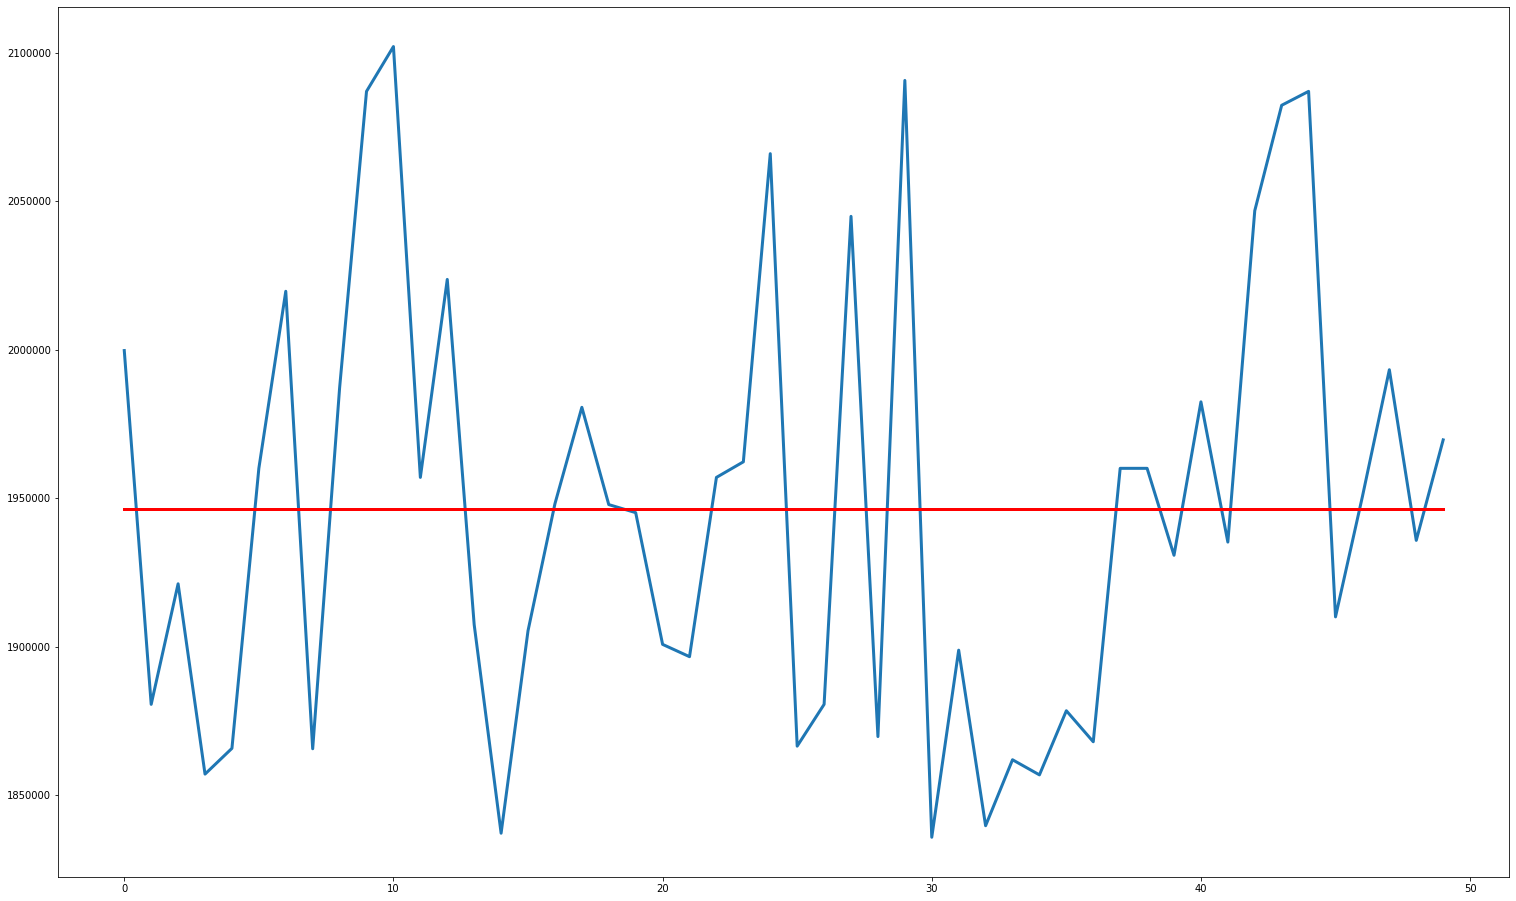

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"]=(26,16) 
plt.plot(perf, linewidth=3)
plt.plot(avg_perf, 'r', linewidth=3)

In [63]:
import pickle
pickle.dump(final_model,open('DecisionTree_Restaurant.pk','wb'))